In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import logging
import xgboost as xgb
from sklearn import svm
from catboost import CatBoostClassifier, Pool
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler


In [2]:
logging.basicConfig(level=logging.INFO)

In [3]:
input_csv = '../model_training/csv/dataset_norm.csv'
df = pd.read_csv(input_csv)
logging.info(df.head())

INFO:root:    ID                                               text  \
0  268  b"resume samples\nthese sample develop illustr...   
1  965  b'allyhunt sample resume fresh graduate\n\nraz...   
2  211  b'charle babbage\n1101 kahn lane\nbaltimore md...   
3  178  b'steve mostovoy\n[address withhold web \xe2\x...   
4  884  b'entry level engineer\naddress phone number e...   

                    class  class_number  senior  Unnamed: 5  
0  INFORMATION-TECHNOLOGY            20       0         NaN  
1             ENGINEERING            15       0         NaN  
2  INFORMATION-TECHNOLOGY            20       0         NaN  
3  INFORMATION-TECHNOLOGY            20       0         NaN  
4             ENGINEERING            15       0         NaN  


In [4]:
df['text_class_number'] = df['text'] + ' ' + df['class_number'].astype(str)
vectorizer = TfidfVectorizer(dtype=np.float64)
X = vectorizer.fit_transform(df['text_class_number'])
y = df['senior']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None, stratify=y)

In [5]:
def plot_confusion_matrix(y_test, y_pred):
    conf_mat = confusion_matrix(y_test, y_pred)
    correct_sum = sum(conf_mat[i][i] for i in range(conf_mat.shape[0]))
    incorrect_sum = sum(sum(row) for row in conf_mat) - correct_sum
    print(f"Correct predictions: {correct_sum}")
    print(f"Incorrect predictions: {incorrect_sum}")
    plt.figure(figsize=(20, 10)) 
    plt.imshow(conf_mat, interpolation='nearest', cmap='Purples')
    plt.title("Confusion Matrix")
    plt.colorbar()
    plt.xlabel("Predicted")
    plt.ylabel("True")
    labels = ['Junior', 'Pleno', 'Senior']
    plt.xticks(range(conf_mat.shape[1]), labels)
    plt.yticks(range(conf_mat.shape[0]), labels)
    
    for i in range(conf_mat.shape[0]):
        for j in range(conf_mat.shape[1]):
            plt.text(j, i, str(conf_mat[i, j]), ha="center", va="center", color="red")
    
    plt.show()

In [6]:
def plot_accuracies(accuracies):
  models = list(accuracies.keys())
  acc_values = list(accuracies.values())
  cmap = plt.cm.tab10 
  colors = cmap(np.arange(len(models)) % cmap.N)
  plt.figure(figsize=(10, 8))
  bars = plt.bar(models, acc_values, color=colors)
  for bar, acc in zip(bars, acc_values):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{acc:.2f}', ha='center', va='bottom', fontsize=8)
  plt.ylabel('Accuracies')
  plt.ylim([0, 1])
  plt.grid(axis='y', linestyle='--', alpha=0.7)
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

In [7]:
def train_naive_bayes(X_train, y_train, X_test, y_test):
    X_train = np.abs(X_train)
    X_test = np.abs(X_test)
    clf = MultinomialNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [8]:
def train_random_forest(X_train, y_train, X_test, y_test):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [9]:
def train_bernoulli(X_train, y_train, X_test, y_test):
    clf = BernoulliNB()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [10]:
def train_logistic_regression(X_train, y_train, X_test, y_test):
    clf = LogisticRegression(max_iter=1000)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [11]:
def train_knn(X_train, y_train, X_test, y_test):
    clf = KNeighborsClassifier(n_neighbors=9)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [12]:
def train_xgboost(X_train, y_train, X_test, y_test):
    clf = xgb.XGBClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [13]:
def train_svm(X_train, y_train, X_test, y_test):
    clf = svm.SVC()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [14]:
def train_xgboost2(X_train, y_train, X_test, y_test):
    clf = xgb.XGBClassifier(max_depth=6, learning_rate=0.1, n_estimators=1000, gamma=0, subsample=0.8, colsample_bytree=0.8, reg_alpha=0, reg_lambda=1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)
    return accuracy

In [15]:
def train_catboost(X_train, y_train, X_test, y_test):
    clf = CatBoostClassifier(
        max_depth=6,
        learning_rate=0.1,
        n_estimators=1000,
        l2_leaf_reg=0
    )
    clf.fit(X_train, y_train, verbose=0)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred)

    return accuracy

Accuracy: 0.515625
Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.76      0.56       107
           1       0.49      0.35      0.40       107
           2       0.77      0.44      0.56       106

    accuracy                           0.52       320
   macro avg       0.57      0.52      0.51       320
weighted avg       0.57      0.52      0.51       320

Correct predictions: 165
Incorrect predictions: 155


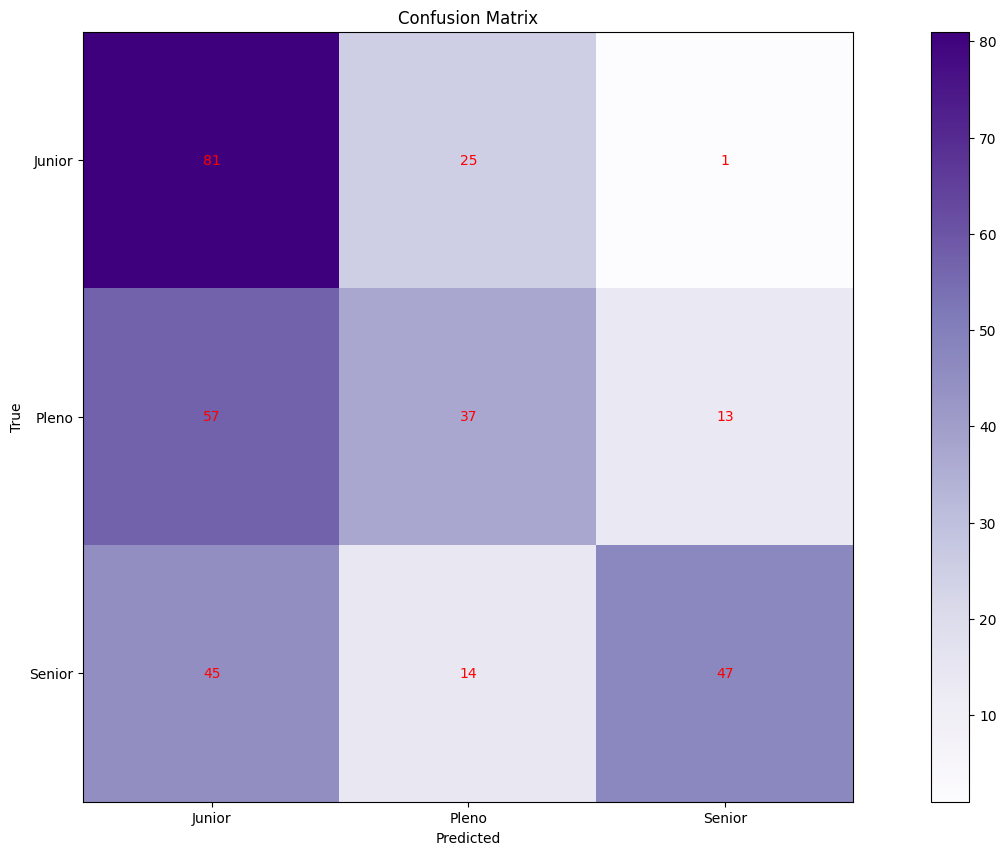

In [16]:
knn_accuracy = train_knn(X_train, y_train, X_test, y_test)


Accuracy: 0.675
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.67      0.71       107
           1       0.59      0.58      0.58       107
           2       0.68      0.77      0.73       106

    accuracy                           0.68       320
   macro avg       0.68      0.68      0.67       320
weighted avg       0.68      0.68      0.67       320

Correct predictions: 216
Incorrect predictions: 104


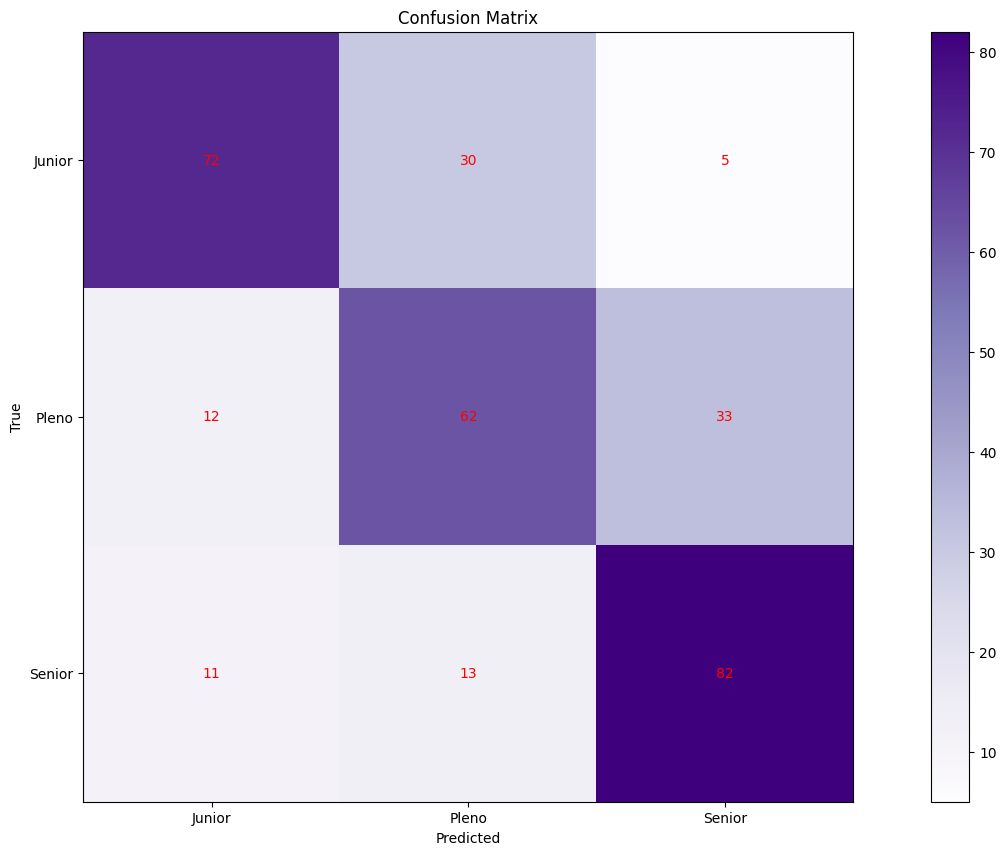

In [17]:
nb_accuracy = train_naive_bayes(X_train, y_train, X_test, y_test)


Accuracy: 0.81875
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.78      0.74      0.76       107
           2       0.87      0.82      0.84       106

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320

Correct predictions: 262
Incorrect predictions: 58


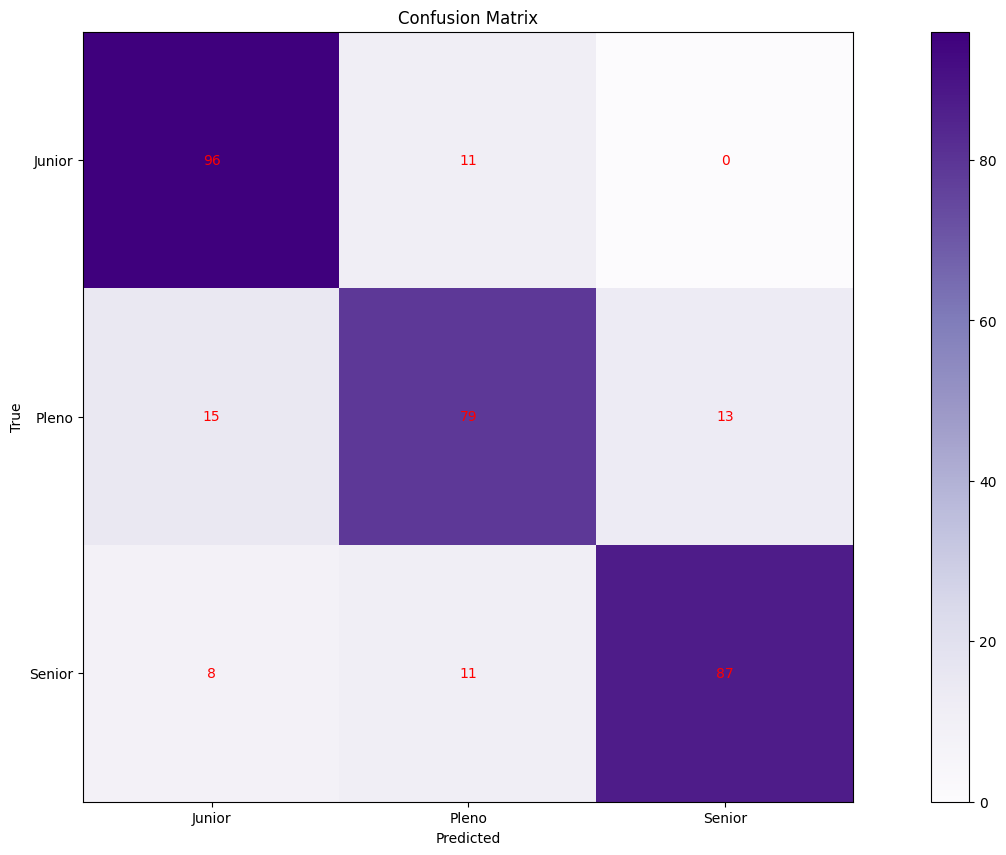

In [18]:
rf_accuracy = train_random_forest(X_train, y_train, X_test, y_test)

Accuracy: 0.759375
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.90      0.83       107
           1       0.71      0.67      0.69       107
           2       0.79      0.71      0.75       106

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

Correct predictions: 243
Incorrect predictions: 77


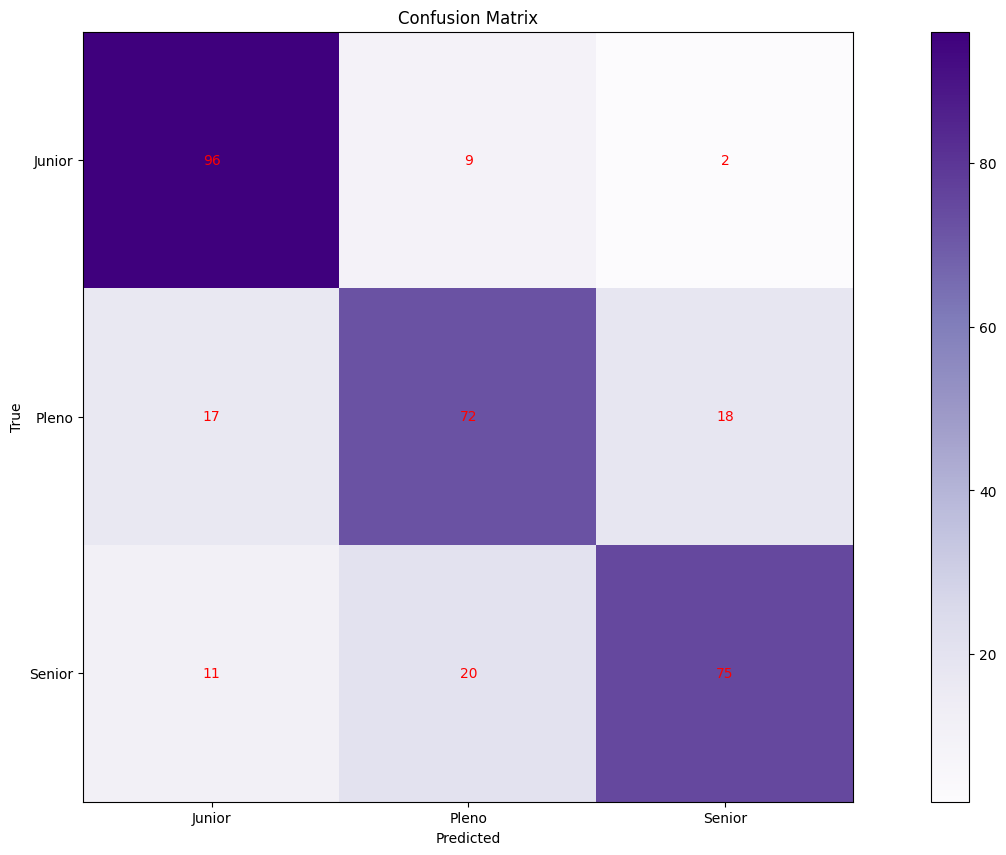

In [19]:
lr_accuracy = train_logistic_regression(X_train, y_train, X_test, y_test)


Accuracy: 0.690625
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.65      0.74       107
           1       0.54      0.88      0.67       107
           2       0.89      0.54      0.67       106

    accuracy                           0.69       320
   macro avg       0.76      0.69      0.69       320
weighted avg       0.76      0.69      0.69       320

Correct predictions: 221
Incorrect predictions: 99


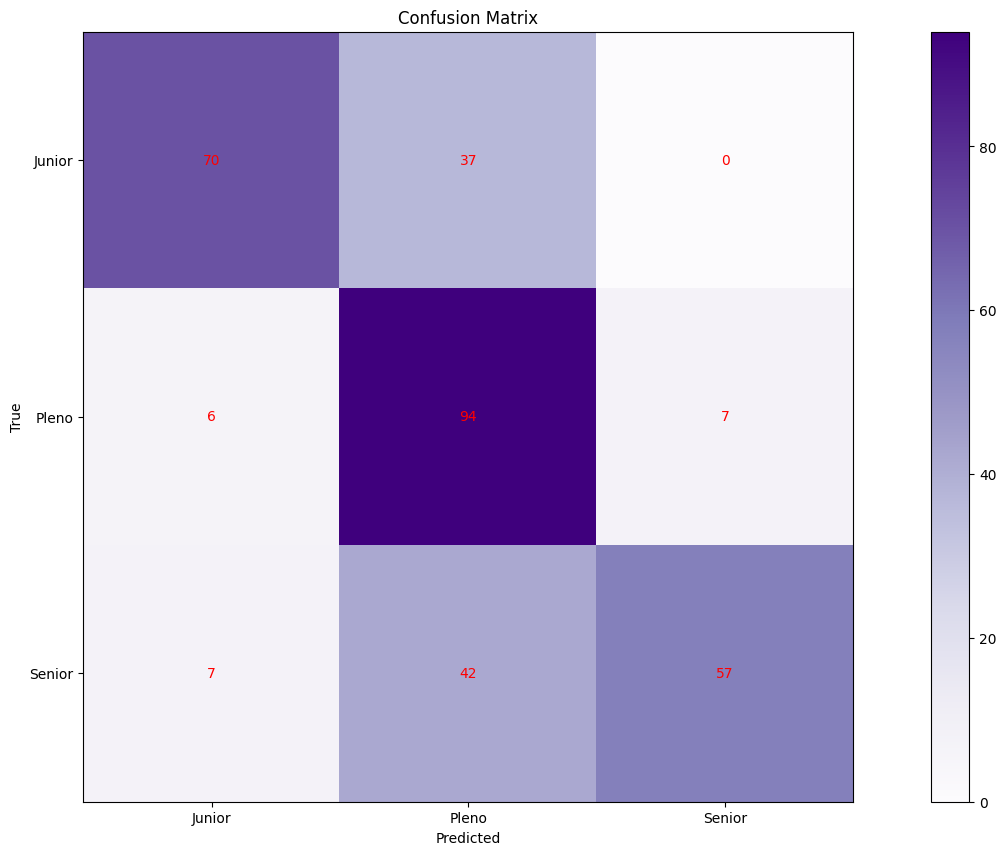

In [20]:
br_accuracy = train_bernoulli(X_train, y_train, X_test, y_test)


Accuracy: 0.815625
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.76      0.73      0.75       107
           2       0.84      0.83      0.83       106

    accuracy                           0.82       320
   macro avg       0.81      0.82      0.81       320
weighted avg       0.81      0.82      0.81       320

Correct predictions: 261
Incorrect predictions: 59


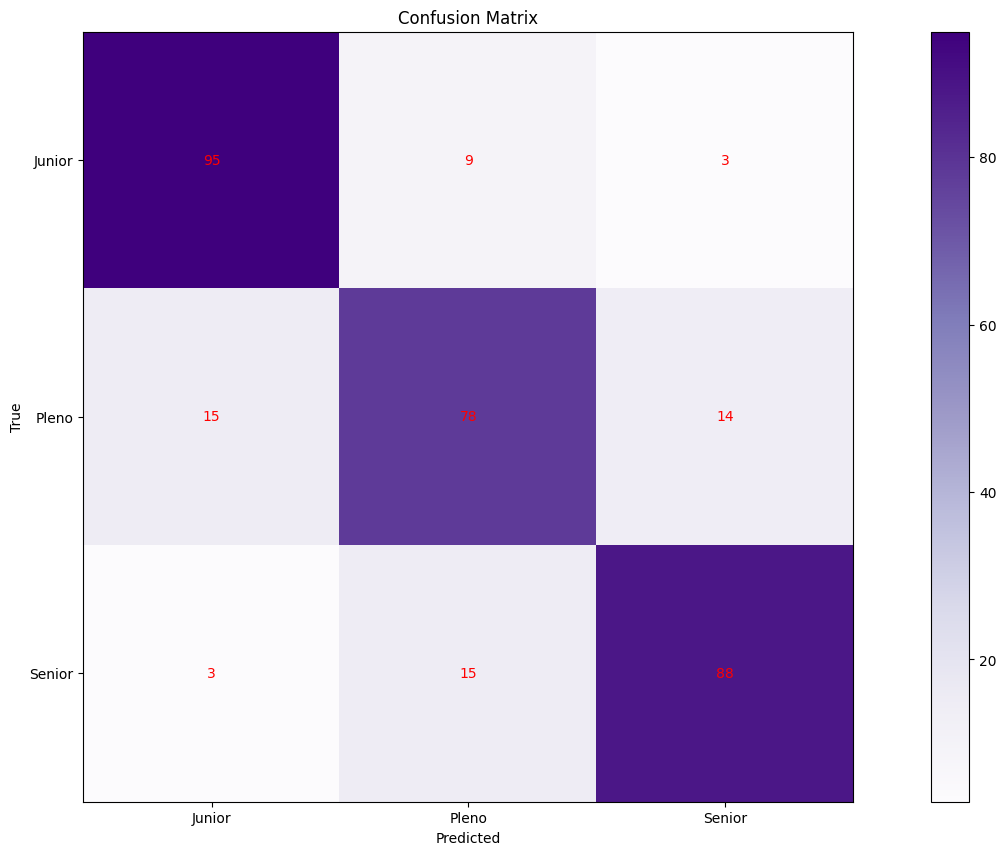

In [21]:
xg_accuracy = train_xgboost(X_train, y_train, X_test, y_test)


Accuracy: 0.7625
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       107
           1       0.70      0.72      0.71       107
           2       0.78      0.65      0.71       106

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

Correct predictions: 244
Incorrect predictions: 76


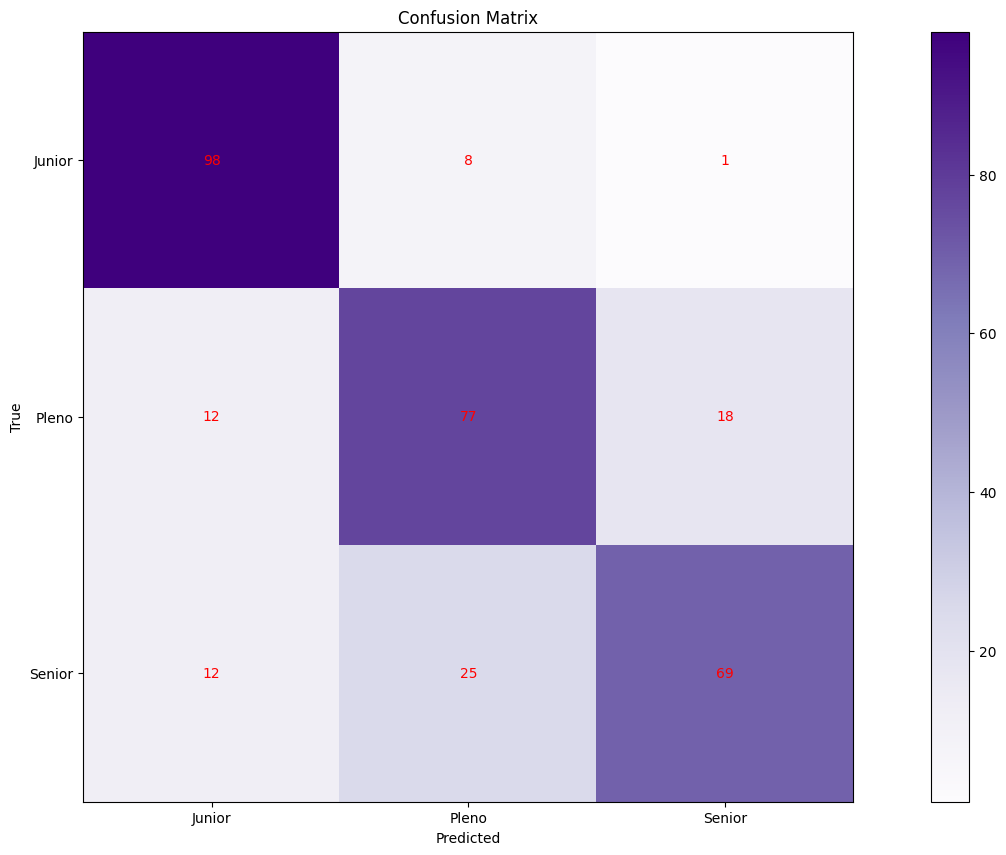

In [22]:
svm_accuracy = train_svm(X_train,y_train,X_test,y_test)


Accuracy: 0.790625
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       107
           1       0.74      0.64      0.68       107
           2       0.81      0.82      0.82       106

    accuracy                           0.79       320
   macro avg       0.79      0.79      0.79       320
weighted avg       0.79      0.79      0.79       320

Correct predictions: 253
Incorrect predictions: 67


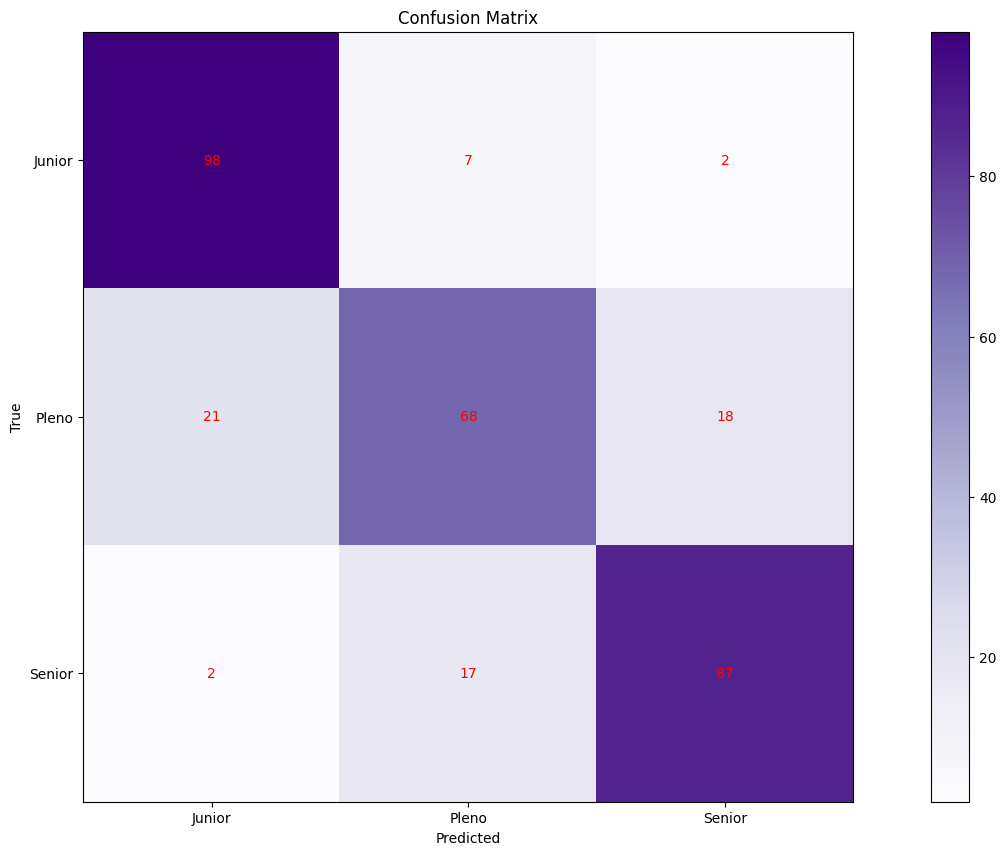

In [23]:
xg_accuracy2 = train_xgboost2(X_train, y_train, X_test, y_test)


Accuracy: 0.821875
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.93      0.87       107
           1       0.78      0.71      0.74       107
           2       0.86      0.83      0.85       106

    accuracy                           0.82       320
   macro avg       0.82      0.82      0.82       320
weighted avg       0.82      0.82      0.82       320

Correct predictions: 263
Incorrect predictions: 57


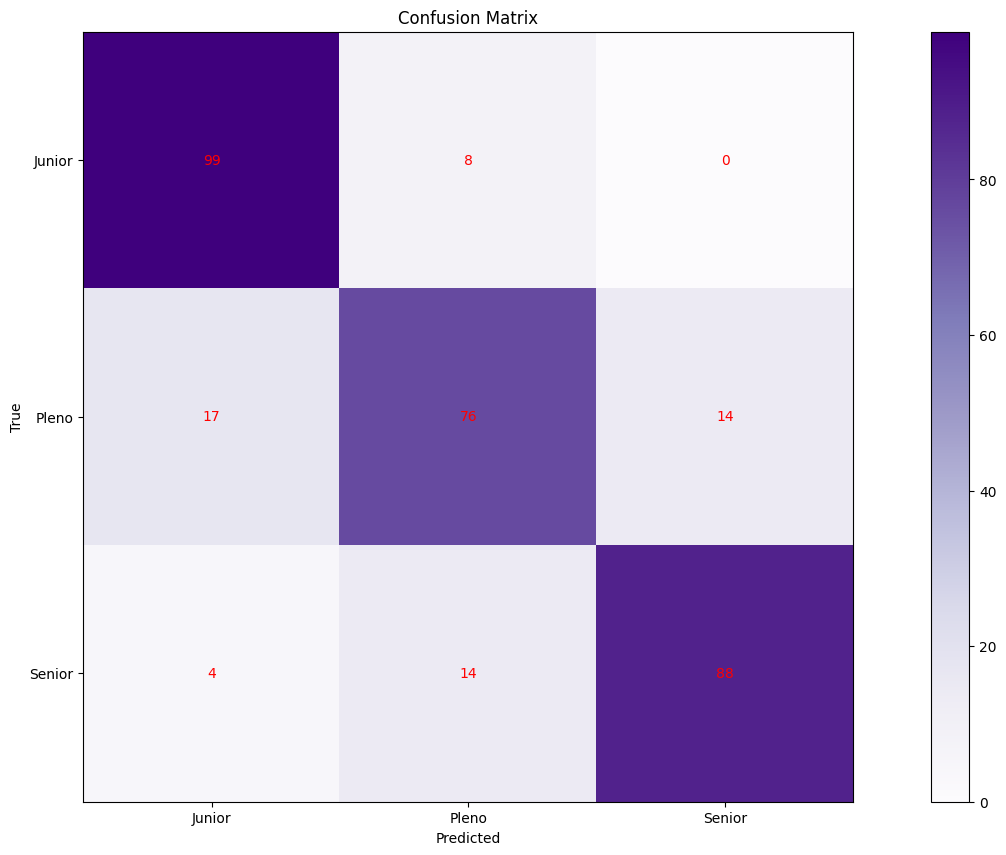

In [24]:
cat_accuracy = train_catboost(X_train,y_train,X_test,y_test)

In [25]:
accuracies = {
    'Naive Bayes': nb_accuracy,
    'Random Forest': rf_accuracy,
    'Logistic Regression': lr_accuracy,
    'Bernoulli': br_accuracy,
    'KNN = 9': knn_accuracy,
    'XGBoost': xg_accuracy,
    'SVM' : svm_accuracy,
    'XGBoost2' : xg_accuracy2,
    'Cat' : cat_accuracy
}

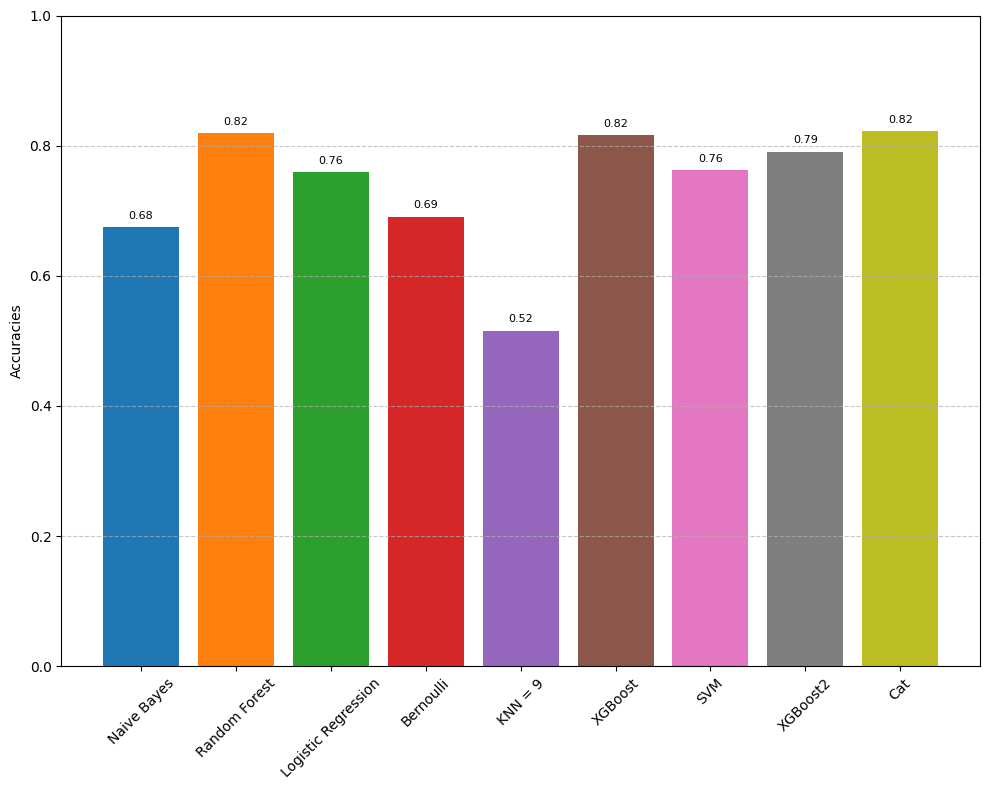

In [26]:
plot_accuracies(accuracies)